**zad. 1**

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
os.chdir('/content/drive/My Drive/DM')

Mounted at /content/drive


In [94]:
data = pd.read_csv('Boston.csv')
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


*a. Jak liczny jest zbiór danych?* – 506 elementów

*b. Iloma atrybutami jest opisany?* – 15-ma

*c. Jakiego typu są wartości poszczególnych atrybutów?*

In [95]:
df = pd.DataFrame(data)    
datatypes = df.dtypes 
datatypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

*d. Czy w zbiorze są brakujące dane (pola NULL)?*

In [96]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [97]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 15 entries, Unnamed: 0 to medv
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


**zad. 2**

In [98]:
print('Minimum:')
print(data.min())
print("------------------------\n")

print('Maximum:')
print(data.max())
print("------------------------\n")

print('Wartość średnia:')
print(data.mean())

Minimum:
Unnamed: 0      1.00000
crim            0.00632
zn              0.00000
indus           0.46000
chas            0.00000
nox             0.38500
rm              3.56100
age             2.90000
dis             1.12960
rad             1.00000
tax           187.00000
ptratio        12.60000
black           0.32000
lstat           1.73000
medv            5.00000
dtype: float64
------------------------

Maximum:
Unnamed: 0    506.0000
crim           88.9762
zn            100.0000
indus          27.7400
chas            1.0000
nox             0.8710
rm              8.7800
age           100.0000
dis            12.1265
rad            24.0000
tax           711.0000
ptratio        22.0000
black         396.9000
lstat          37.9700
medv           50.0000
dtype: float64
------------------------

Wartość średnia:
Unnamed: 0    253.500000
crim            3.613524
zn             11.363636
indus          11.136779
chas            0.069170
nox             0.554695
rm              6.284634
age

In [99]:
# Odchylenie standardowe:
data_col = data['crim']

# 1) liczymy średnią arytmetyczną:
sa = data['crim'].sum() / data['crim'].count()

# 2) wariancja
sum_roz = 0

for i in data_col:
  sum_roz += (i - sa) ** 2

war = sum_roz / data['crim'].count()

# 3) odchylenie standardowe
odch_st = math.sqrt(war)
odch_st

8.59304135129577

In [100]:
print("Odchylenie standardowe:\n")
# z (axis=1) da dla wartości w kolumnie
print(np.std(data, axis=0))

Odchylenie standardowe:

Unnamed: 0    146.069333
crim            8.593041
zn             23.299396
indus           6.853571
chas            0.253743
nox             0.115763
rm              0.701923
age            28.121033
dis             2.103628
rad             8.698651
tax           168.370495
ptratio         2.162805
black          91.204607
lstat           7.134002
medv            9.188012
dtype: float64


**zad. 3**

In [101]:
data_col_1 = data['rm']
data_col_2 = data['medv']
X = data_col_1.sum() / data_col_1.count()
Y = data_col_2.sum() / data_col_2.count()
count = data_col_1.count()
licznik = 0
mian1 = 0
mian2 = 0

for i in range(0, count):
  licznik += (data_col_1[i] - X) * (data_col_2[i] - Y)
  mian1 += ((data_col_1[i] - X) ** 2)
  mian2 += ((data_col_2[i] - Y) ** 2)

# Kowariancja:
kw = licznik / (count - 1)

# Korelacja
kr = licznik / ((mian1*mian2) ** 0.5)

print("Kowariancja: ", kw)
print("Korelacja:  ", kr)

Kowariancja:  4.493445879544476
Korelacja:   0.6953599470715388


In [102]:
# macierz korelacji dla całego zbioru danych
data.cov()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,21378.500000,512.381872,-352.578218,400.668663,-0.139604,6.755757,-8.215627,838.722871,-93.045936,873.364356,16427.306931,92.138119,-3938.380535,269.868842,-304.723960
crim,512.381872,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
zn,-352.578218,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
indus,400.668663,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
chas,-0.139604,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
nox,6.755757,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
rm,-8.215627,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
age,838.722871,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
dis,-93.045936,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
rad,873.364356,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228


**zad. 4**

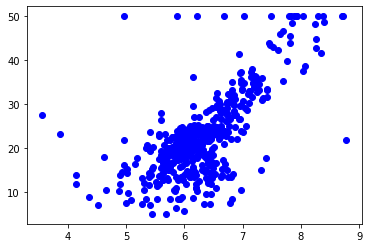

In [103]:
plt.scatter(data_col_1, data_col_2, c = "blue")
plt.show()

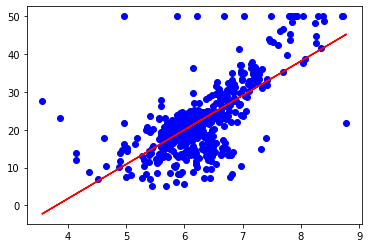

In [106]:
mx = np.array(((np.sum(data_col_1*data_col_1),  np.sum(data_col_1)), (np.sum(data_col_1), data_col_1.size)))
mod = np.linalg.inv(mx) 
mx2 = np.array((np.sum(data_col_1*data_col_2), np.sum(data_col_2)))
mx2.shape = (2, 1)
m = mod.dot(mx2)
a = m[0][0]
b = m[1][0]

plt.plot(data_col_1, a*data_col_1 + b, color = "red")
plt.scatter(data_col_1, data_col_2, c = "blue")
plt.show()

**zad. 5**

In [107]:
data.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


Korelacja:  -0.7692301132258254


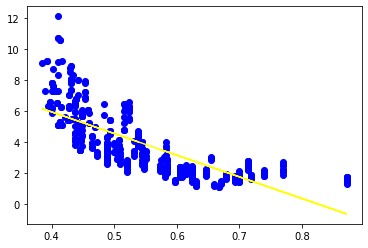

In [89]:
data_col_1 = data['nox']
data_col_2 = data['dis']
X = data_col_1.sum() / data_col_1.count()
Y = data_col_2.sum() / data_col_2.count()
count = data_col_1.count()
licznik = 0
mian1 = 0
mian2 = 0

for i in range(0, count):
  licznik += (data_col_1[i] - X) * (data_col_2[i] - Y)
  mian1 += ((data_col_1[i] - X) ** 2)
  mian2 += ((data_col_2[i] - Y) ** 2)

# Korelacja
kr = licznik / ((mian1*mian2) ** 0.5)
print("Korelacja: ", kr)

mx = np.array(((np.sum(data_col_1*data_col_1),  np.sum(data_col_1)), (np.sum(data_col_1), data_col_1.size)))
mod = np.linalg.inv(mx) 
mx2 = np.array((np.sum(data_col_1*data_col_2), np.sum(data_col_2)))
mx2.shape = (2, 1)
m = mod.dot(mx2)
a = m[0][0]
b = m[1][0]

plt.plot(data_col_1, a*data_col_1 + b, color = "yellow")
plt.scatter(data_col_1, data_col_2, c = "blue")
plt.show()